포르투갈 북부의 와인 확학 성분으로부터 와인 퀄리티 0~10점을 예측합니다.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(path, sep=';')

In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


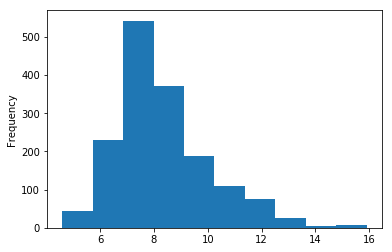

In [11]:
df['fixed acidity'].plot.hist()

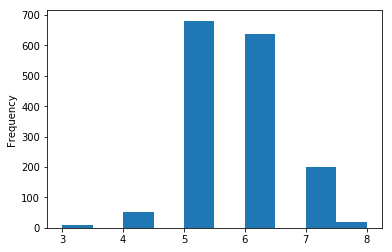

In [16]:
df['quality'].plot.hist()

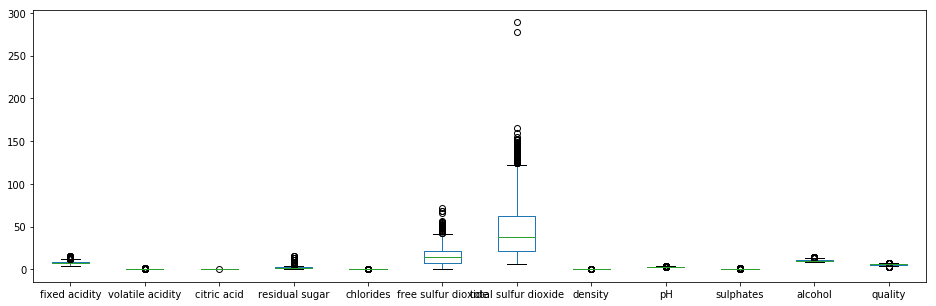

In [19]:
df.plot.box(figsize=(16,5))

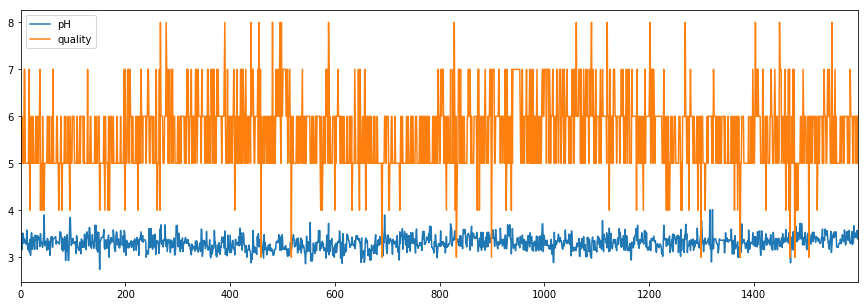

In [24]:
df[['pH', 'quality']].plot(figsize=(15,5))

학습/테스트 50:50 나누기  
Y: quality 예측하기  
모델: Linear Regression  
결정계수로 학습셋과 테스트셋의 성능을 측정하세요.  

In [62]:
x = df.iloc[:,:11]
y = df.iloc[:,-1:]

In [63]:
split_index = int(len(x) * 0.5) # = len(x) // 2
split_index

799

In [64]:
x = x.values
y = y.values

In [65]:
# np.random.shuffle(x)
# np.random.shuffle(y)

In [66]:
x_train = x[:split_index]
x_test = x[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [67]:
model = LinearRegression().fit(x_train, y_train)

In [68]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.31912070960586714, 0.35403750397451006)

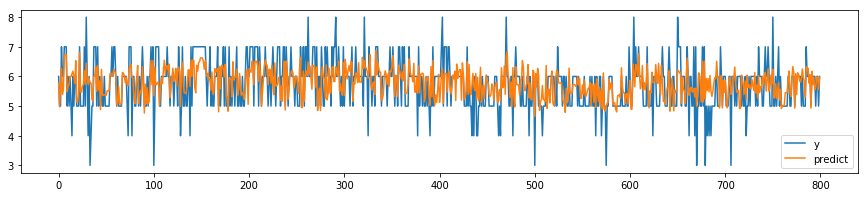

In [69]:
plt.figure(figsize=(15,3))
plt.plot(y_test, label='y')
plt.plot(model.predict(x_test), label='predict')
plt.legend()

수학적 표기법  
$1e-0$ : $0$  
$1e-1$ : $0.1$  
$1e-2$ : $0.01$  

In [71]:
np.set_printoptions(precision=3, suppress=True)

$y = W * X + b$


In [73]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [72]:
model.coef_, model.intercept_

(array([[  0.038,  -1.023,  -0.264,   0.002,  -1.195,   0.005,  -0.005,
         -10.968,  -0.085,   0.682,   0.267]]), array([ 14.184]))

공분산: 두 요소간의 관계  
1:상관있음, 0:상관없음, -1:역상관있음

오늘 날씨가 좋습니다.  
나의 기분이 나쁘지 않습니다.  
상관이 있다 0.5

나의 형제가 기분이 최악이다. 그래서 나한테 짜증낸다. > 나의 기분은 ??다: 상관이 있다.

연예인 X가 어제 ? 먹었다.  
나는 오늘 점심으로 ? 먹었다. : 상관관계 0

In [74]:
df.corr() # 공분산

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
